In [23]:
import tensorflow as tf
import keras
from keras import layers, models, optimizers, metrics

In [24]:
#Load california housing dataset
from sklearn.datasets import fetch_california_housing

housing=fetch_california_housing()
X_housing=housing.data
y_housing=housing.target


print("California housing dataset")
print(f"Samples:{X_housing.shape[0]}")
print(f"Features:{X_housing.shape[1]}")
print(f"Feature Names:{housing.feature_names}")
print(f"\nTarget: Median House Value (in $100, 000)")
print(f"Target range: ${y_housing.min()*100000:.0f} - ${y_housing.max()*100000:.0f}")

California housing dataset
Samples:20640
Features:8
Feature Names:['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

Target: Median House Value (in $100, 000)
Target range: $14999 - $500001


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

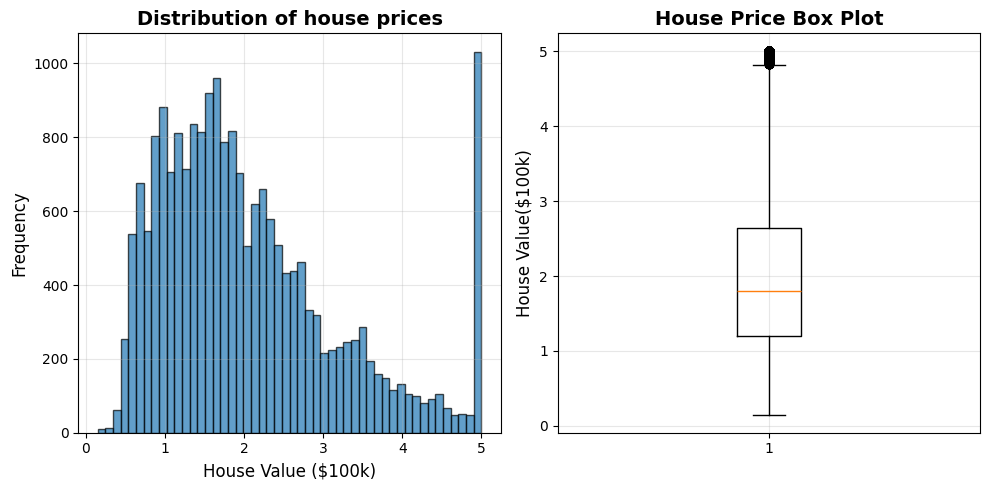

In [26]:
#Visualize target distribution
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(y_housing, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('House Value ($100k)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of house prices', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(y_housing, vert=True)
plt.ylabel('House Value($100k)', fontsize=12)
plt.title('House Price Box Plot', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [28]:
#Split and normalize data
X_train_h, X_test_h, y_train_h, y_test_h=train_test_split(X_housing, y_housing, test_size=0.2, random_state=42)

scaler_housing=StandardScaler()
X_train_scaled=scaler_housing.fit_transform(X_train_h)
X_test_scaled=scaler_housing.transform(X_test_h)

print(f"Training Samples:{len(X_train_scaled)}")
print(f"Testing Samples:{len(X_test_scaled)}")
print("\n✓ Data prepared for regression")

Training Samples:16512
Testing Samples:4128

✓ Data prepared for regression


#Build regression model

In [29]:
regression_model=keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(8,)),
    layers.Dropout(0.2),

    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),

    layers.Dense(16, activation='relu'),

    #Output layer for regression
    layers.Dense(1)
], name='house_pricing_prediction')

regression_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "house_pricing_prediction"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,201 (12.50 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
#Compile model
regression_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss='mse',
    metrics=['mae']
)

print("✓ Regression model compiled!")
print("\nRegression Settings")
print(" Loss:MSE (penalizes large errors more)")
print(" Metric:MAE (average absolute error in $100k)")

✓ Regression model compiled!

Regression Settings
 Loss:MSE (penalizes large errors more)
 Metric:MAE (average absolute error in $100k)


In [42]:
history_reg=regression_model.fit(
    X_train_h, y_train_h,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)

print("✓ Training Completed")

✓ Training Completed


In [43]:
for key in history_reg.history.keys():
  print(key)

loss
mae
val_loss
val_mae


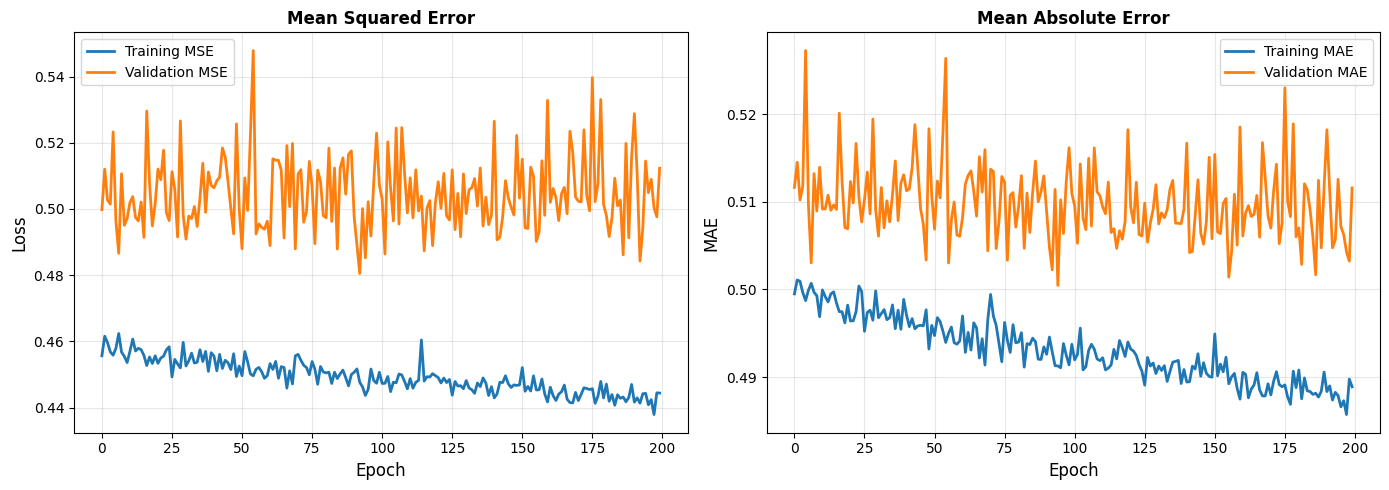

In [44]:
#Visualize Training
fig, (ax1, ax2)=plt.subplots(1, 2, figsize=(14, 5))

#MSE
ax1.plot(history_reg.history['loss'], label='Training MSE', linewidth=2)
ax1.plot(history_reg.history['val_loss'], label='Validation MSE', linewidth=2)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Loss', fontsize=12)
ax1.set_title('Mean Squared Error', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

#MAE
ax2.plot(history_reg.history['mae'], label='Training MAE', linewidth=2)
ax2.plot(history_reg.history['val_mae'], label='Validation MAE', linewidth=2)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('MAE', fontsize=12)
ax2.set_title('Mean Absolute Error', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [45]:
#Evaluate on test set
test_mse, test_mae=regression_model.evaluate(X_test_h, y_test_h, verbose=0)

print("📊 Test Results:")
print(f"Test MSE:{test_mse:.4f}")
print(f"Test MAE:{test_mae:.4f}")
print(f"Test RMSE:{np.sqrt(test_mse):.4f}")

📊 Test Results:
Test MSE:0.5059
Test MAE:0.5119
Test RMSE:0.7112


In [48]:
#Make predictions
predictions_reg=regression_model.predict(X_test_h, verbose=0).flatten()

#Calculate R²
from sklearn.metrics import r2_score

r2=r2_score(y_test_h, predictions_reg)
print(f"R² Score:{r2_score(y_test_h, predictions_reg):.4f}")
print(f"\n💡 R² = {r2_score(y_test_h, predictions_reg):.2%} of variance explained by the model")

R² Score:0.6140

💡 R² = 61.40% of variance explained by the model


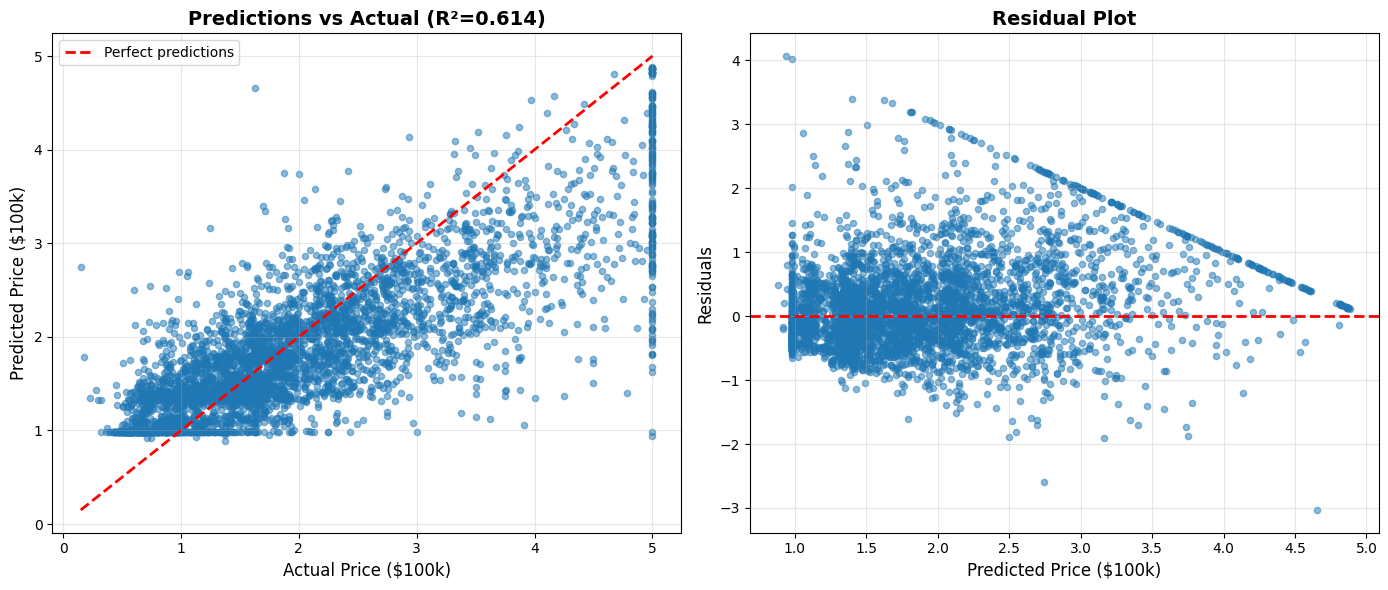

💡 Good model: Points close to red line, residuals centered around 0


In [51]:
# Visualize predictions vs actual
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot
ax1.scatter(y_test_h, predictions_reg, alpha=0.5, s=20)
ax1.plot([y_test_h.min(), y_test_h.max()],
         [y_test_h.min(), y_test_h.max()],
         'r--', linewidth=2, label='Perfect predictions')
ax1.set_xlabel('Actual Price ($100k)', fontsize=12)
ax1.set_ylabel('Predicted Price ($100k)', fontsize=12)
ax1.set_title(f'Predictions vs Actual (R²={r2:.3f})', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Residuals
residuals = y_test_h - predictions_reg
ax2.scatter(predictions_reg, residuals, alpha=0.5, s=20)
ax2.axhline(y=0, color='r', linestyle='--', linewidth=2)
ax2.set_xlabel('Predicted Price ($100k)', fontsize=12)
ax2.set_ylabel('Residuals', fontsize=12)
ax2.set_title('Residual Plot', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("💡 Good model: Points close to red line, residuals centered around 0")

In [53]:
#Sample predictions
print("Sample Predictions")
print("\nActual | Predicted | Error")
print("-"*35)
for i in range(10):
  actual=y_test_h[i]*100000
  pred=predictions_reg[i]*100000
  error=abs(actual-pred)
  print(f"${actual:,.0f}| ${pred:,.0f} | ${error:,.0f}")

Sample Predictions

Actual | Predicted | Error
-----------------------------------
$47,700| $97,894 | $50,194
$45,800| $138,255 | $92,455
$500,001| $337,493 | $162,508
$218,600| $212,979 | $5,621
$278,000| $189,868 | $88,132
$158,700| $211,323 | $52,623
$198,200| $224,820 | $26,620
$157,500| $151,851 | $5,649
$340,000| $244,719 | $95,281
$446,600| $407,616 | $38,984
